In [8]:
#Importando os Frameworks
import pandas as pd

In [9]:
#1. Liste os 10 primeiros itens do dataset.
df = pd.read_csv('Netflix TV Shows and Movies.csv')

primeirosItens = df.head(10)
print(primeirosItens)

   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   
5      5   tm14873                      Dirty Harry  MOVIE   
6      6  tm185072                     My Fair Lady  MOVIE   
7      7   tm98978                  The Blue Lagoon  MOVIE   
8      8  tm119281                 Bonnie and Clyde  MOVIE   
9      9   tm67378                The Professionals  MOVIE   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins t

In [10]:
#2. Liste os últimos 10 itens do dataset. 
df = pd.read_csv('Netflix TV Shows and Movies.csv')

ultimosItens = df.tail(10)
print(ultimosItens)

      index         id                               title   type  \
5273   5273  tm1097142                            My Bride  MOVIE   
5274   5274   tm878575                 The Heartbreak Club  MOVIE   
5275   5275   ts286386                         The Big Day   SHOW   
5276   5276   tm985215                Princess 'Daya'Reese  MOVIE   
5277   5277  tm1004011                       Time to Dance  MOVIE   
5278   5278  tm1040816         Momshies! Your Soul is Mine  MOVIE   
5279   5279  tm1014599                           Fine Wine  MOVIE   
5280   5280  tm1045018                               Clash  MOVIE   
5281   5281  tm1098060                      Shadow Parties  MOVIE   
5282   5282   ts271048  Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
5273  The story follows a young man and woman who go...          2021   
5274  Coping with heartbreak, the shy owner of floun...          2021   
5275  For six engaged

In [11]:
#3. Qual o filme com o maior imdb_score e qual o filme com o pior imdb_score? 
df = pd.read_csv('Netflix TV Shows and Movies.csv')

melhorFilme = df.loc[df['imdb_score'].idxmax()]
piorFilme = df.loc[df['imdb_score'].idxmin()]

print("Melhor Filme:")
print(melhorFilme)
print("\nPior Filme:")
print(piorFilme)

Melhor Filme:
index                                                              622
id                                                            ts160526
title                                                         Khawatir
type                                                              SHOW
description          A TV show devoted to help young people to be m...
release_year                                                      2005
age_certification                                                TV-14
runtime                                                             20
imdb_id                                                      tt3062514
imdb_score                                                         9.6
imdb_votes                                                      3046.0
Name: 622, dtype: object

Pior Filme:
index                                                             1664
id                                                            tm549892
title                    

In [12]:
#4. Qual a média de duração dos shows de TV e duração de filmes?
df = pd.read_csv('Netflix TV Shows and Movies.csv')

mediaShow = df[df['type'] == 'SHOW']['runtime'].mean()
mediaFilme = df[df['type'] == 'MOVIE']['runtime'].mean()

print(f"Média de Duração dos Filmes: {mediaShow:.2f} minutos")
print(f"Média de Duração dos Shows de TV: {mediaFilme:.2f} minutos")

Média de Duração dos Filmes: 38.63 minutos
Média de Duração dos Shows de TV: 101.54 minutos


In [14]:
#5. Qual o show de TV com maior duração por episódio e o filme com duração mais longa?
df = pd.read_csv('Netflix TV Shows and Movies.csv')

maiorShow = df[df['type'] == 'SHOW'].loc[df[df['type'] == 'SHOW']['runtime'].idxmax()]
maiorFilme = df[df['type'] == 'MOVIE'].loc[df[df['type'] == 'MOVIE']['runtime'].idxmax()]

print("Show de TV com maior duração por episódio:")
print(maiorShow[['title', 'runtime']])
print("\nFilme com a duração mais longa:")
print(maiorFilme[['title', 'runtime']])


Show de TV com maior duração por episódio:
title      1994
runtime     178
Name: 3598, dtype: object

Filme com a duração mais longa:
title      No Longer Kids
runtime               235
Name: 24, dtype: object


In [16]:
#6. Qual ano apresentou a maior quantidade de filmes avaliados com imdb?
df = pd.read_csv('Netflix TV Shows and Movies.csv')

filmeImdb = df[(df['type'] == 'MOVIE') & (df['imdb_score'].notna())]
contagem = filmeImdb['release_year'].value_counts()
anoMaiorquantidade = contagem.idxmax()
maiorQuantidade = contagem.max()

print(f"O ano com a maior quantidade de filmes avaliados com IMDb foi {anoMaiorquantidade} com {maiorQuantidade} filmes.")


O ano com a maior quantidade de filmes avaliados com IMDb foi 2019 com 469 filmes.


In [19]:
#7. Quais as categorias encontradas de age_certification e qual a quantidade de filmes para cada categoria?
df = pd.read_csv('Netflix TV Shows and Movies.csv')

filme = df[df['type'] == 'MOVIE']
categoriaAge = filme['age_certification'].value_counts()

print("Quantidade de filmes por categoria de idade:")
print(categoriaAge)

Quantidade de filmes por categoria de idade:
age_certification
R        548
PG-13    424
PG       238
G        105
NC-17     13
Name: count, dtype: int64


In [20]:
#8. Quais colunas apresentam campos vazios? Qual a quantidade de campos vazios?
df = pd.read_csv('Netflix TV Shows and Movies.csv')

camposVazios = df.isnull().sum()
camposVazios = camposVazios[camposVazios > 0]

print("Colunas com campos vazios e a quantidade de campos vazios:")
print(camposVazios)

Colunas com campos vazios e a quantidade de campos vazios:
description             5
age_certification    2285
imdb_votes             16
dtype: int64


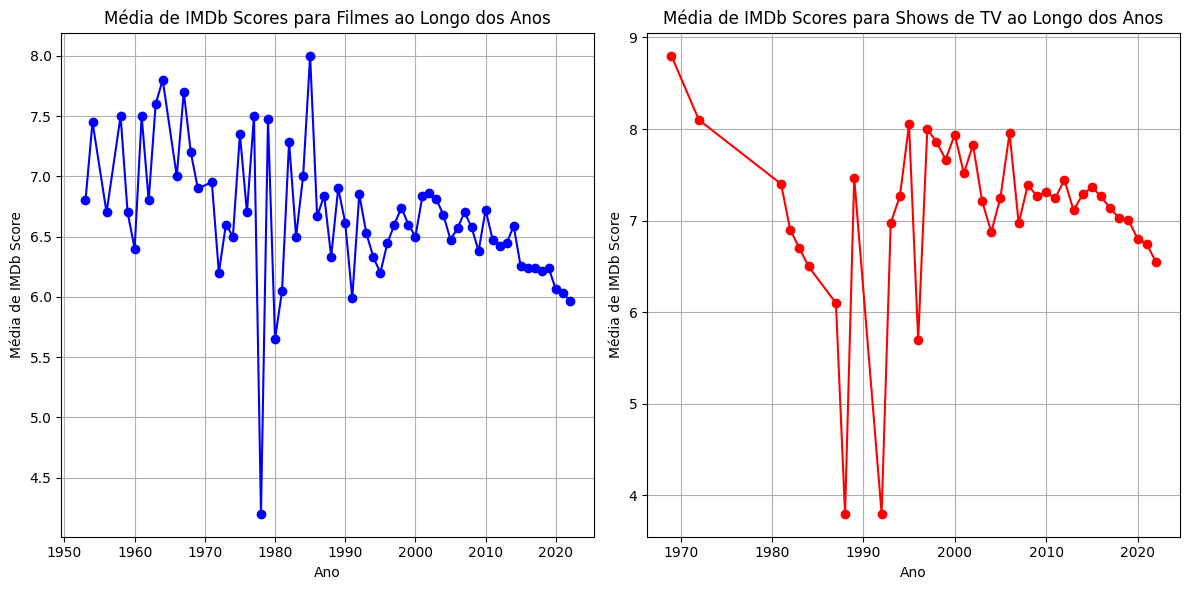

In [22]:
#9. Gere um gráfico que você considere interessantes para apresentar a média de scores ao longo dos anos para filme e outro para shows.
import matplotlib.pyplot as plt

df = pd.read_csv('Netflix TV Shows and Movies.csv')

filmes = df[df['type'] == 'MOVIE']
shows = df[df['type'] == 'SHOW']
media_filmes = filmes.groupby('release_year')['imdb_score'].mean()
media_shows = shows.groupby('release_year')['imdb_score'].mean()

plt.figure(figsize=(12, 6))

#FILME
plt.subplot(1, 2, 1)
plt.plot(media_filmes.index, media_filmes.values, marker='o', linestyle='-', color='b')
plt.title('Média de IMDb Scores para Filmes ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Média de IMDb Score')
plt.grid()

#SHOW
plt.subplot(1, 2, 2)
plt.plot(media_shows.index, media_shows.values, marker='o', linestyle='-', color='r')
plt.title('Média de IMDb Scores para Shows de TV ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Média de IMDb Score')
plt.grid()

plt.tight_layout()
plt.show()

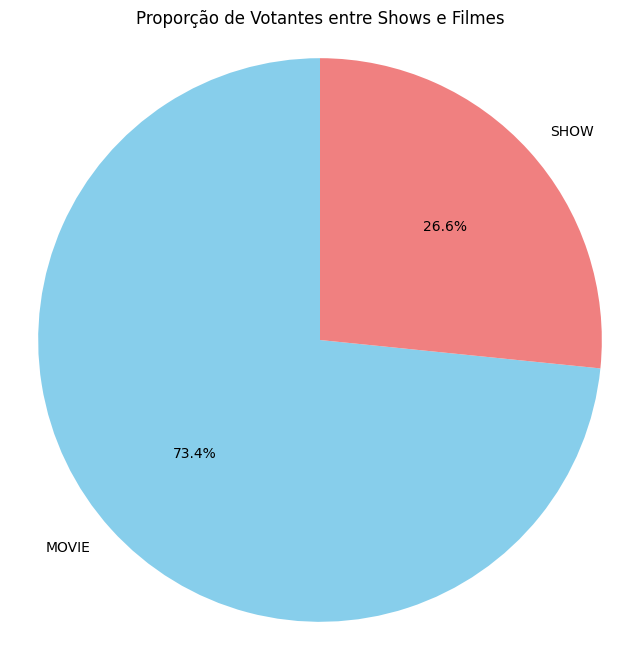

In [23]:
#10. Gere um gráfico que você considere interessante para apontar a proporção de votantes para shows e filmes.
import matplotlib.pyplot as plt

df = pd.read_csv('Netflix TV Shows and Movies.csv')

proporcao_votantes = df.groupby('type')['imdb_votes'].sum()

plt.figure(figsize=(8, 8))
plt.pie(proporcao_votantes, labels=proporcao_votantes.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporção de Votantes entre Shows e Filmes')
plt.axis('equal')
plt.show()